In [221]:
import numpy as np
import pandas as pd
import os
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn import metrics
%matplotlib inline
from matplotlib import pyplot
import keras
import tensorflow as tf


In [200]:
from keras.datasets import mnist

In [201]:
(x_training,y_training), (x_testing, y_testing) = mnist.load_data()

In [202]:
print('X_train: ' + str(x_training.shape))
print('Y_train: ' + str(y_training.shape))
print('X_test:  '  + str(x_testing.shape))
print('Y_test:  '  + str(y_testing.shape))

X_train: (60000, 28, 28)
Y_train: (60000,)
X_test:  (10000, 28, 28)
Y_test:  (10000,)


In [203]:
x_training=x_training/255
x_testing=x_testing/255

In [204]:
x_train=x_training.reshape(60000,784)
x_test=x_testing.reshape(10000,784)

In [205]:
print("First ten training labels: ", y_training[:10])

First ten training labels:  [5 0 4 1 9 2 1 3 1 4]


In [206]:
len(x_training)


60000

In [207]:
sample = x_train[0]
sample

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [208]:
picture = sample[0:]
picture.shape

(784,)

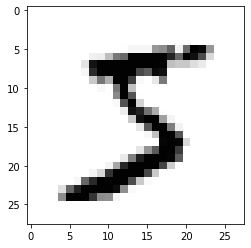

In [209]:
plt.imshow(picture.reshape(28, 28), cmap='Greys', interpolation= 'None')

In [210]:
y_training[0]


5

In [211]:
model= keras.Sequential([
                         keras.layers.Dense(10, input_shape=(784,),activation='sigmoid')
])
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)
model.fit(x_train,y_training, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4708 - accuracy: 0.8759
Epoch 2/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3045 - accuracy: 0.9147
Epoch 3/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2838 - accuracy: 0.9206
Epoch 4/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2732 - accuracy: 0.9231
Epoch 5/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2665 - accuracy: 0.9258


In [212]:
model.evaluate(x_test,y_test)


313/313 [==============================] - 0s 1ms/step - loss: 0.2667 - accuracy: 0.9257


[0.26673921942710876, 0.9257000088691711]

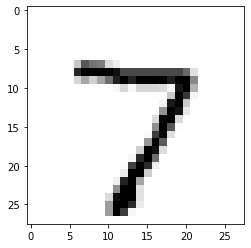

In [216]:
record=x_test[0]
picture1 = np.asfarray(record[0:])
plt.imshow(picture1.reshape(28, 28), cmap='Greys', interpolation='None')

In [217]:
y_predicted=model.predict(x_test)
y_predicted[0]

array([2.9455781e-02, 6.1691748e-07, 7.5187773e-02, 9.6233642e-01,
       3.2503009e-03, 1.0180649e-01, 1.4173474e-06, 9.9983096e-01,
       9.4273567e-02, 7.0057124e-01], dtype=float32)

In [218]:
np.argmax(y_predicted[0])

7

In [219]:
y_predicted_labels= [np.argmax(i) for i in y_predicted]

In [223]:
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 961,    0,    1,    1,    0,    5,    8,    3,    1,    0],
       [   0, 1117,    3,    2,    0,    1,    4,    2,    6,    0],
       [   5,    9,  938,   16,   10,    2,   13,   10,   25,    4],
       [   2,    0,   19,  935,    1,   15,    2,   10,   18,    8],
       [   1,    2,    2,    1,  924,    0,   11,    3,    8,   30],
       [  10,    3,    4,   51,   12,  748,   19,    9,   30,    6],
       [   9,    3,    5,    1,    7,    9,  918,    2,    4,    0],
       [   1,    7,   23,    7,    9,    0,    0,  946,    1,   34],
       [   7,   11,    8,   25,    9,   23,   10,   11,  860,   10],
       [  11,    7,    1,   11,   34,    4,    0,   24,    7,  910]],
      dtype=int32)>

Text(69.0, 0.5, 'Truth')

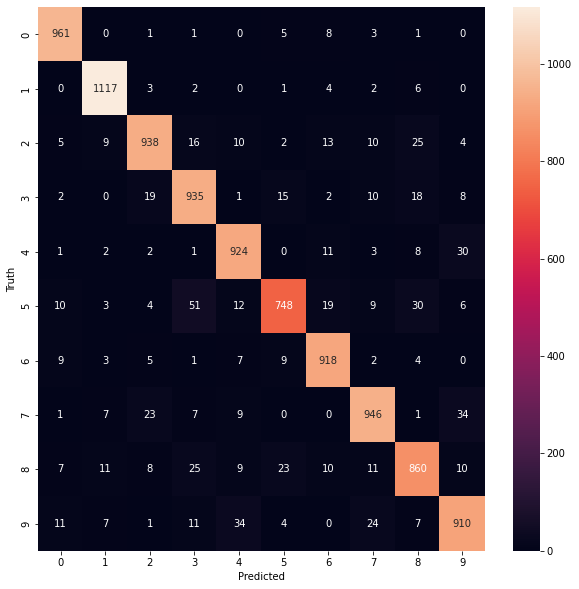

In [224]:
plt.figure(figsize=(10,10))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [225]:
model= keras.Sequential([
                         keras.layers.Dense(100, input_shape=(784,),activation='relu'),
                         keras.layers.Dense(10, activation='sigmoid')
])
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)
model.fit(x_train,y_training, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2693 - accuracy: 0.9234
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1222 - accuracy: 0.9639
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0857 - accuracy: 0.9742
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0654 - accuracy: 0.9803
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0521 - accuracy: 0.9837


In [226]:
model.evaluate(x_test,y_test)


313/313 [==============================] - 0s 1ms/step - loss: 0.0809 - accuracy: 0.9753


[0.08093152940273285, 0.9753000140190125]

In [227]:
y_predicted=model.predict(x_test)

In [228]:
y_predicted_labels= [np.argmax(i) for i in y_predicted]

In [229]:
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 969,    0,    0,    1,    1,    4,    1,    1,    3,    0],
       [   0, 1124,    2,    1,    0,    0,    2,    0,    6,    0],
       [   7,    0, 1002,    9,    1,    0,    2,    5,    5,    1],
       [   0,    0,    3,  993,    0,    5,    0,    5,    4,    0],
       [   0,    0,    2,    0,  967,    0,    5,    1,    1,    6],
       [   2,    0,    0,    8,    1,  877,    3,    0,    1,    0],
       [   5,    2,    0,    2,    4,    6,  936,    0,    3,    0],
       [   2,    4,   13,    3,    2,    0,    0, 1000,    1,    3],
       [   3,    1,    4,   10,    5,    5,    3,    4,  937,    2],
       [   3,    6,    0,   14,   20,    8,    0,    5,    5,  948]],
      dtype=int32)>

Text(69.0, 0.5, 'Truth')

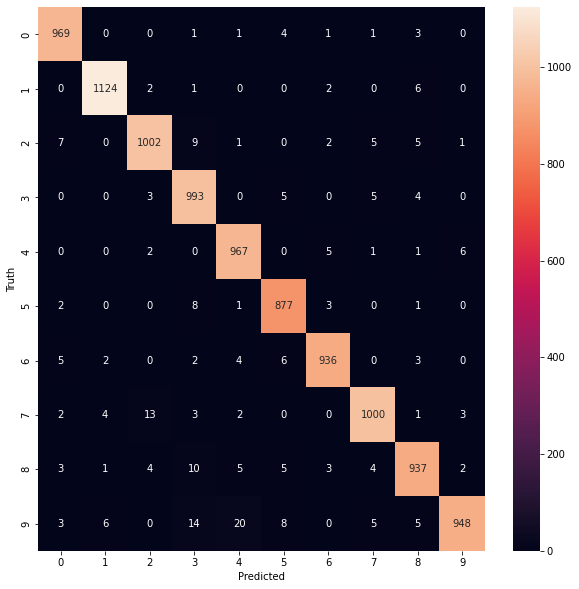

In [230]:
plt.figure(figsize=(10,10))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [232]:
model= keras.Sequential([
                         keras.layers.Dense(100, input_shape=(784,),activation='softmax'),
                         keras.layers.Dense(100, input_shape=(784,),activation='relu'),
                         keras.layers.Dense(10, activation='sigmoid')
])
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)
model.fit(x_train,y_training, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.4769 - accuracy: 0.8672
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2222 - accuracy: 0.9372
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1926 - accuracy: 0.9453
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1717 - accuracy: 0.9512
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1562 - accuracy: 0.9553


In [234]:
model.evaluate(x_test,y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.1851 - accuracy: 0.9473


In [237]:
y_predicted=model.predict(x_test)

In [238]:
y_predicted_labels= [np.argmax(i) for i in y_predicted]

In [239]:
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 966,    0,    0,    1,    1,    3,    3,    1,    2,    3],
       [   0, 1115,    2,    1,    1,    1,    5,    2,    8,    0],
       [   9,    4,  992,    7,    2,    0,    4,    5,    8,    1],
       [   2,    1,   26,  914,    1,   26,    1,    4,   24,   11],
       [   1,    2,    8,    0,  906,    0,   14,    1,    6,   44],
       [   9,    1,    1,   17,    1,  822,   12,    2,   18,    9],
       [  12,    3,    3,    0,    5,    9,  920,    0,    6,    0],
       [   1,    9,   17,    0,    2,    0,    0,  968,    6,   25],
       [   9,    0,    4,   12,    7,    5,    9,    6,  918,    4],
       [   9,    4,    0,    7,   13,    1,    0,    5,   18,  952]],
      dtype=int32)>

Text(69.0, 0.5, 'Truth')

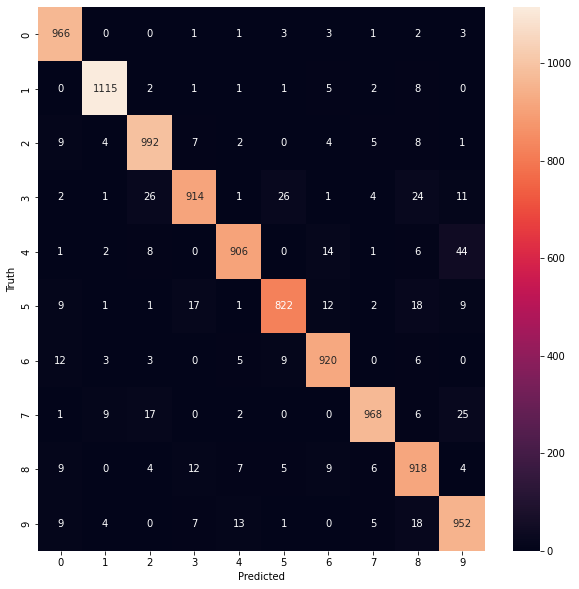

In [240]:
plt.figure(figsize=(10,10))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')